## Example script
Takes you through the basics of generating a lower resolution version of the paper's figures and simulations. 
#### Load dependencies and other problem constants

In [1]:
push!(LOAD_PATH, "../src/")
using Pairwise, Multiagent

d = get_pomdp()
g = get_grid(d.pomdp.states)

RectangleGrid with 866133 points

### Pairwise encounter
The code here generates the QMDP approximate solution to the pairwise encounter and visualizes the policy.
#### Solve for pairwise encounter policy
Generation of pairwise encounter policy takes a few minutes. Comment out `gen_pairwise_policy` line to use pre-computed policy datafile for the next part.

In [2]:
# gen_pairwise_policy(d)
alpha = read_alpha()

866134x36 Array{Float64,2}:
 -18.0     -12.0     -10.0     -12.0     …  -3.0      -9.0      -8.83093e-7 
 -18.0     -12.0     -10.0     -12.0        -3.0      -9.0      -2.23162e-6 
 -18.0     -12.0     -10.0     -12.0        -3.0      -9.0      -3.78956e-6 
 -18.0012  -12.0     -10.0     -12.0        -3.0      -9.0      -6.186e-6   
 -18.0021  -12.0     -10.0     -12.0        -3.0      -9.0      -1.02507e-5 
 -18.0037  -12.0     -10.0     -12.0     …  -3.0      -9.00057  -1.75455e-5 
 -18.0049  -12.0     -10.0     -12.0        -3.0      -9.00072  -3.1238e-5  
 -18.0061  -12.0     -10.0     -12.0        -3.0      -9.0009   -5.80098e-5 
 -18.0074  -12.0004  -10.0     -12.0        -3.0      -9.00114  -0.000112508
 -18.0088  -12.0013  -10.0     -12.0        -3.0      -9.00143  -0.000228084
 -18.0106  -12.0021  -10.0     -12.0     …  -3.0      -9.00181  -0.000485354
 -18.0126  -12.0037  -10.0     -12.0        -3.00014  -9.00237  -0.00109752 
 -18.015   -12.0054  -10.0     -12.0        -3.0

#### Visualize policy as heatmap

Slider{Float64}([Input{Float64}] 180.0,"p",180.0,0.0:10.0:360.0)

Slider{Float64}([Input{Float64}] 15.0,"v0",15.0,10.0:5.0:20.0)

Slider{Float64}([Input{Float64}] 15.0,"v1",15.0,10.0:5.0:20.0)

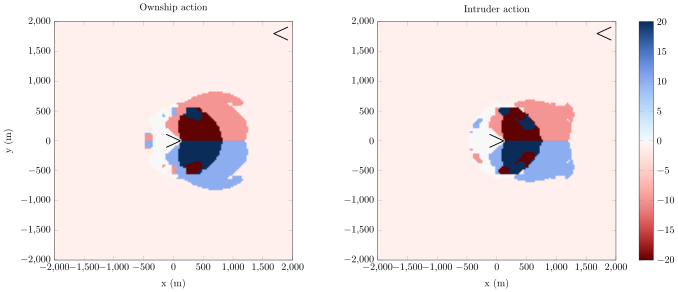

In [3]:
viz_pairwise_policy(d)

### Multithreat coordination
The code here uses the pairwise encounter solution from above to generate locally optimal policies in real-time. Basic visualization and trajectory simulation and plotting are demonstrated below.
#### Visualize example three-aircraft encounter policy heatmap
Note that `iutilFn = 1` correponds to the max-min policy, and that `iutilFn = 2` corresponds to the max-sum policy.

Slider{Int64}([Input{Int64}] 1,"iutilFn",1,1:2)

Slider{Int64}([Input{Int64}] 180,"p",180,0:30:360)

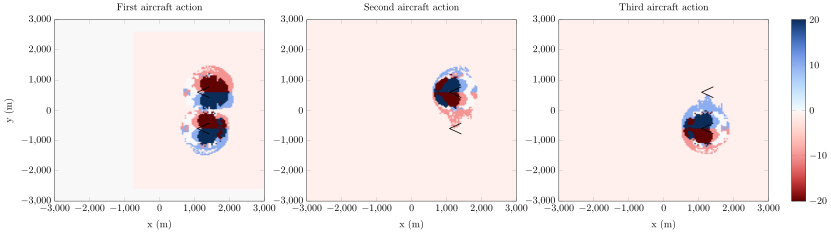

In [4]:
viz_policy(alpha, g)

#### Four-aircraft encounter simulation with trajectory visualization
Change the arguments to the desired coordination or baseline algorithm and utility function.

number of collisions = 0, average decision time = 1.811e+00 ms

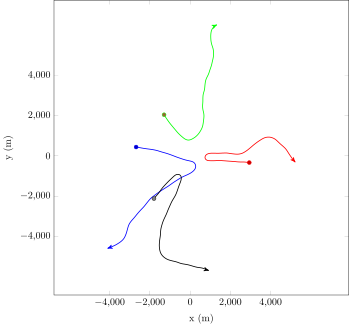

In [5]:
algorithm = utm # input utm, uncrd, coord, naive (closest-threat), or distr
utility = maxmin # input maxmin or maxsum
plot_trajs(algorithm, utility, alpha, g)

#### Bulk stress tests

In [6]:
nuavs = 2:5
nsim = 10
bulk_test(nuavs, nsim, alpha, g)

beginning stress tests...


LoadError: interrupt
while loading In[6], in expression starting on line 3